# Inferential Analysis and Statistical Insights

This notebook explores relationships between risk factors, cancer severity, treatment costs, and survival outcomes using statistical analysis and visualization.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("../data/raw/global_cancer_patients.csv")
data.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


Determine the relationship between risk factors and cancer severity

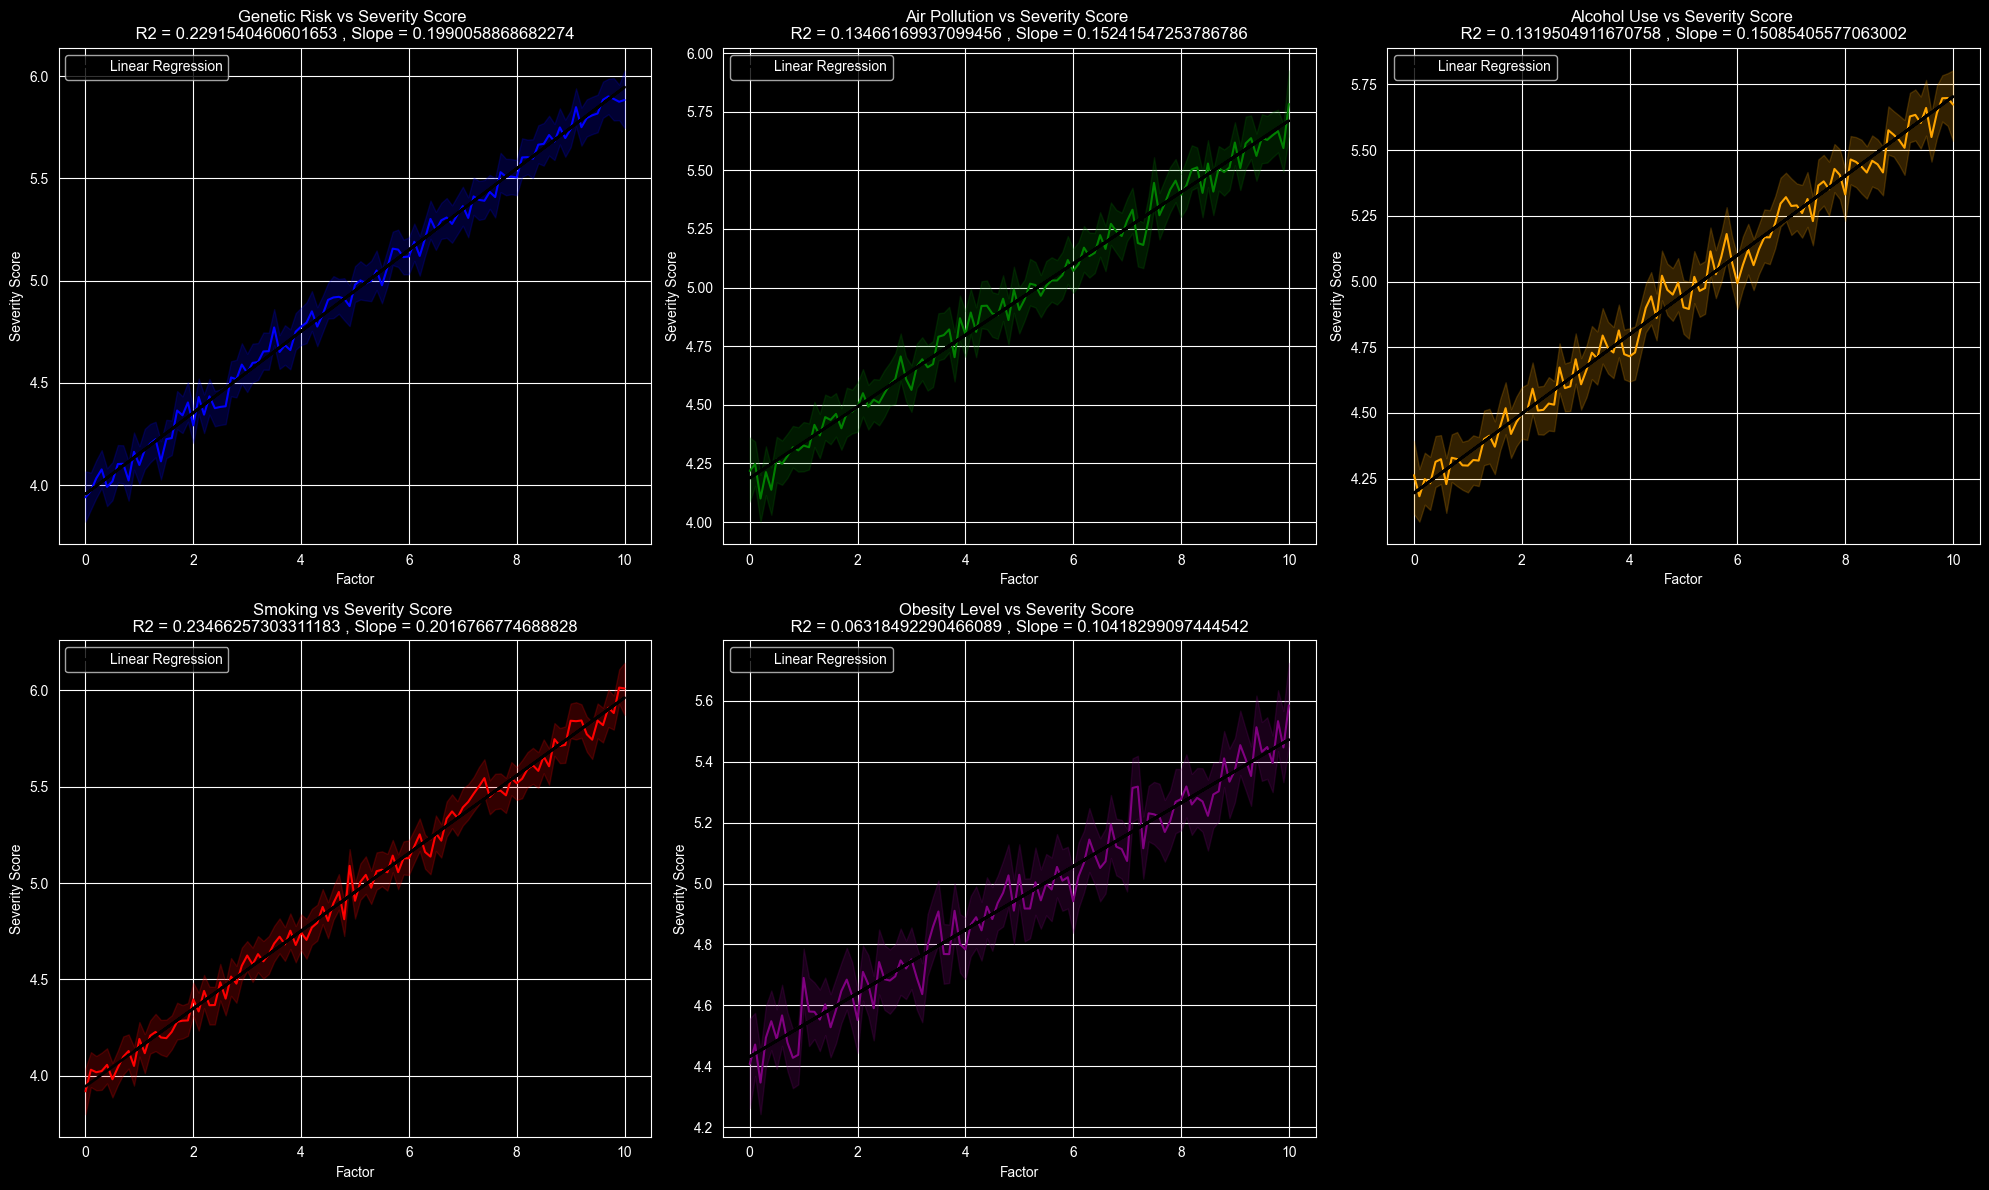

In [13]:
from scipy.stats import linregress # because we will find relationship between two variables
risk_factors=['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

titles =['Genetic Risk','Air Pollution', 'Alcohol Use', 'Smoking', 'Obesity Level']

colors= ["blue" , "green" , "orange" , "red" , "purple"]

plt.figure(figsize=(20,12))
for i ,(factor , title ,color) in enumerate(zip(risk_factors , titles , colors),1):
    #Automated analysis across multiple risk factors using a loop instead of repeating code.
    plt.subplot(2,3,i)

    x=data[factor]
    y=data["Target_Severity_Score"]
    slope, intercept, r_value, p_value, std_err = linregress(x,y) #This calculates regression statistics
    r_squared = r_value**2

    sns.lineplot(x=factor , y="Target_Severity_Score", data=data, color=color)
    plt.plot(x,x*slope+intercept, color="black" ,linewidth=2 ,label="Linear Regression")
    plt.title(f"{title} vs Severity Score \n R2 = {r_squared} , Slope = {slope} ")
    plt.xlabel("Factor")
    plt.ylabel("Severity Score")
    plt.legend()

#line = y=mx+c [m = slope ,c = intercept]
plt.tight_layout()
plt.show()



### Analysis and Interpretation

Linear regression analysis was performed to examine the relationship between individual risk factors and cancer severity score.

All risk factors — Genetic Risk, Air Pollution, Alcohol Use, Smoking, and Obesity Level — show a positive linear relationship with cancer severity. This means that as the level of each risk factor increases, the severity score also tends to increase.

However, the R² values range approximately between 0.06 and 0.23, which indicates that each factor individually explains only a small portion of the variation in cancer severity.

Among the variables:
- Smoking and Genetic Risk show relatively stronger relationships.
- Air Pollution and Alcohol Use demonstrate moderate associations.
- Obesity Level shows the weakest individual impact.

Overall, no single risk factor alone strongly predicts cancer severity.

### Key Insight

Cancer severity appears to be influenced by multiple factors acting together rather than a single risk factor. While each variable contributes positively to severity, their individual impact is limited, suggesting that cancer progression is multifactorial in nature.

### Analyze the proportion of early -stage diagnoses by cancer type

In [14]:
data["Cancer_Type"].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [23]:
stage_count = data[data["Cancer_Type"]=="Lung"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of lungs cancer diagnosed at stage0 and stage1= {proportion}")

proportion of lungs cancer diagnosed at stage0 and stage1= 38.43156356551388


In [24]:
stage_count = data[data["Cancer_Type"]=="Leukemia"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Leukemia cancer diagnosed at stage0 and stage1= {proportion}")

proportion of Leukemia cancer diagnosed at stage0 and stage1= 39.53080114905841


In [25]:
stage_count = data[data["Cancer_Type"]=="Breast"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Breast cancer diagnosed at stage0 and stage1= {proportion}")

proportion of Breast cancer diagnosed at stage0 and stage1= 39.47325900791727


In [26]:
stage_count = data[data["Cancer_Type"]=="Colon"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Colon cancer diagnosed at stage0 and stage1= {proportion}")

proportion of Colon cancer diagnosed at stage0 and stage1= 40.41718946047679


In [27]:
stage_count = data[data["Cancer_Type"]=="Skin"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Skin cancer diagnosed at stage0 and stage1= {proportion}")

proportion of Skin cancer diagnosed at stage0 and stage1= 40.41084898090194


In [28]:
stage_count = data[data["Cancer_Type"]=="Cervical"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Cervical cancer diagnosed at stage0 and stage1= {proportion}")

proportion of Cervical cancer diagnosed at stage0 and stage1= 39.85856637737062


In [29]:
stage_count = data[data["Cancer_Type"]=="Prostate"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Prostate cancer diagnosed at stage0 and stage1= {proportion}")

proportion of Prostate cancer diagnosed at stage0 and stage1= 40.187064045656314


In [30]:
stage_count = data[data["Cancer_Type"]=="Liver"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Liver cancer diagnosed at stage0 and stage1= {proportion}")

proportion of Liver cancer diagnosed at stage0 and stage1= 40.614498319731155


### Analysis and Interpretation

The analysis shows that early-stage cancer diagnosis occurs at a similar rate across all cancer types, with approximately 38% to 41% of cases detected at Stage I.

Liver cancer has the highest proportion of early detection, while lung cancer has the lowest. This indicates that although early diagnosis is fairly common, a large number of cases are still being identified at later stages.

The small differences between cancer types suggest that current screening and diagnostic practices are working at a comparable level across cancers, but there is still room for improvement — especially in detecting lung cancer earlier.

### Key Insight

Overall, around 40% of cancers are diagnosed early, which is encouraging but also highlights an opportunity to improve early detection methods. Strengthening screening programs and adopting better diagnostic technologies could help increase early-stage identification and improve patient survival outcomes.

# Identify key predictors of cancer severity and survival years.